In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/house_pricing.csv")
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [3]:
df.shape

(814, 6)

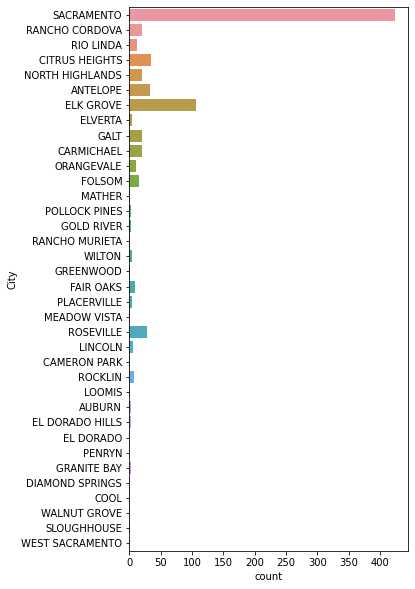

In [4]:
plt.figure(figsize=(5,10))
sns.countplot(y='City',data=df)
plt.show()

In [5]:
px.box(df,x='City',y='Price')

In [6]:
px.box(df,x='Type',y='Price')

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
x = df[['Beds','Baths','SquareFeet']]
y = df['Price']

In [9]:
cityEnc = OneHotEncoder(drop='first')
cityDummies = cityEnc.fit_transform(df[['City']])
cityDummies = cityDummies.toarray()
cityDummies.shape

(814, 35)

In [10]:
x = np.hstack([cityDummies,x.values])

In [11]:
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [12]:

from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=1)

In [14]:
xtrain.shape
xtest.shape

(163, 38)

In [15]:
reg = RandomForestRegressor(max_depth=1200)
reg.fit(xtrain,ytrain)
score = reg.score(xtest,ytest)
ypred = reg.predict(xtest)

In [16]:
print(score*100)

87.51566706662088


In [17]:
df['Pred']=reg.predict(x)

<AxesSubplot:ylabel='Density'>

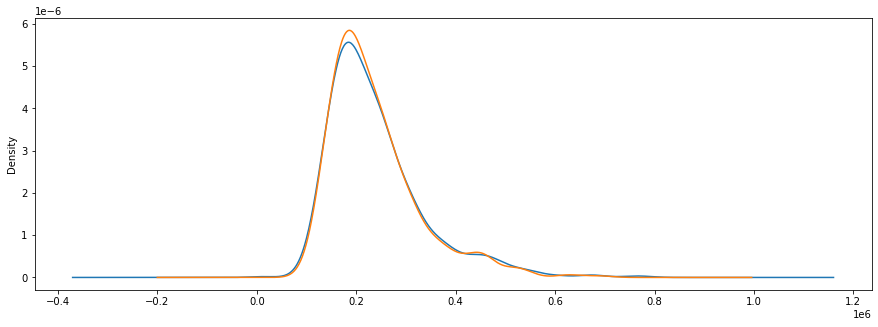

In [18]:
df['Price'].plot(kind = 'kde',figsize=(15,5))
df['Pred'].plot(kind='kde',figsize=(15,5))

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
print("Mae",mean_absolute_error(ytest,ypred))
print("Mse",mean_squared_error(ytest,ypred))

Mae 14034.148011627247
Mse 1014442896.3512236
